<a href="https://colab.research.google.com/github/ztjohnson23/MAT494/blob/main/hw_1-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

1.4.1 Singular Value Decomposition

In [40]:
# Create matrix A
# np.random.seed(25)
A = np.random.randint(-10,11,[3,3])
print(A)

# Find singular values of A
_,V = np.linalg.eig(np.matrix.transpose(A)@A)

lam = []
for i in range(len(V)):
  lam_i = np.matrix.transpose(A@V[i])@A@V[i]
  lam.append(lam_i)

lam.sort(reverse=True)
print(f'\nLambda values:  {lam}')

sig = np.sqrt(lam)
print(f'Sigma values:  {sig}')

sig2 = []
for i in range(len(V)):
  sig_i = np.linalg.norm(A@V[i])
  sig2.append(sig_i)
print(f'Norm of Av:  {sig2}')

[[ 0  8  9]
 [ 4 -3  5]
 [ 4  2 -3]]

Lambda values:  [123.6820251314997, 63.287028346911214, 37.03094652158908]
Sigma values:  [11.12124207  7.95531447  6.08530579]
Norm of Av:  [6.085305787024107, 11.121242067840251, 7.955314471905634]


We have calculated the singular values of A (Sigma), and can see that our values of sigma are equal to the norms, or the magnitudes of the vectors   Av(i), where v(i) is an eigenvector of ATA.

1.4.3 Principal Component Analysis

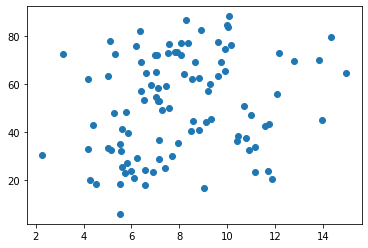

In [15]:
# Create data
np.random.seed(13)
study_hours = st.poisson.rvs(mu=8,size=100) + np.random.rand(100)
test_scores = 3*np.multiply(study_hours,np.random.rand(100))+np.random.randint(5,70,100)
plt.scatter(study_hours,test_scores)
plt.show()

[ 8.02567405 51.12841103]


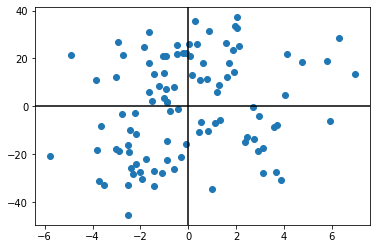

In [16]:
# Create matrix of observation
matrix_obs = np.matrix.transpose(np.array([study_hours,test_scores]))

# Calculate sample mean
N = len(study_hours)
M = 1/N * sum(matrix_obs)
print(M)

# Mean-deviation form
B = np.zeros([100,2])
for i in range(len(matrix_obs)):
  B[i,:] = matrix_obs[i,:]-M
  
plt.scatter(B[:,0],B[:,1])
plt.axhline(color='black')
plt.axvline(color='black')
plt.show()

Now we have our data in mean-deviation form, so it is ready for principal component analysis.

In [17]:
# Covariance matrix
S = 1/(N-1) * B@np.matrix.transpose(B)

# Variance
v = []
for i in range(len(S)):
  v.append(S[i,i])

# Total variance
V = S.trace()
print(V)
V = sum(v)
print(V)

438.22482704009633
438.22482704009644


We have a list (v) of the variances of our data, and the total variance (V), which is equal to the sum of individual variances, or the trace of the covariance matrix S.